In [91]:
import requests
import json
import pandas as pd
import numpy as np

# importação dos de vendas.
url = "https://cdn3.gnarususercontent.com.br/2928-transformacao-manipulacao-dados/dados_vendas_clientes.json"
resposta = requests.get(url)
# Convertendo o JSON para DataFrame
data_vendas_online  = pd.DataFrame(resposta.json())

## Etapa 1

### Projeto desafio 1: vendas online

O objetivo desse projeto é realizar uma análise dos resultados de um evento com os clientes de uma empresa de vendas online. Foi coletado um conjunto de dados que contém os clientes que mais gastaram com produtos dentro de 5 dias de vendas, que é o período de duração do evento. Essa análise vai identificar o cliente com a maior compra na semana, que irá receber um prêmio da loja, e posteriormente, ela pode ajudar a empresa a criar novas estratégias para atrair mais clientes.

A base de dados utilizada nessa análise é a dados_vendas_clientes.json (anteriormente carregada) e contém informações importantes sobre os clientes como, o nome de cadastro do cliente, o valor total pago na compra e o dia da compra.

In [92]:
# visualizando os dados.
data_vendas_online.head()

,dados_vendas
0,"{'Data de venda': '06/06/2022', 'Cliente': ['@..."
1,"{'Data de venda': '07/06/2022', 'Cliente': ['I..."
2,"{'Data de venda': '08/06/2022', 'Cliente': ['I..."
3,"{'Data de venda': '09/06/2022', 'Cliente': ['J..."
4,"{'Data de venda': '10/06/2022', 'Cliente': ['M..."


In [93]:
data_vendas_online = pd.json_normalize(data_vendas_online['dados_vendas'])
data_vendas_online

,Data de venda,Cliente,Valor da compra
0,06/06/2022,"[@ANA _LUCIA 321, DieGO ARMANDIU 210, DieGO AR...","[R$ 836,5, R$ 573,33, R$ 392,8, R$ 512,34]"
1,07/06/2022,"[Isabely JOanes 738, Isabely JOanes 738, Isabe...","[R$ 825,31, R$ 168,07, R$ 339,18, R$ 314,69]"
2,08/06/2022,"[Isabely JOanes 738, JOãO Gabriel 671, Julya m...","[R$ 682,05, R$ 386,34, R$ 622,65, R$ 630,79]"
3,09/06/2022,"[Julya meireles 914, MaRIA Julia 444, MaRIA Ju...","[R$ 390,3, R$ 759,16, R$ 334,47, R$ 678,78]"
4,10/06/2022,"[MaRIA Julia 444, PEDRO PASCO 812, Paulo castr...","[R$ 314,24, R$ 311,15, R$ 899,16, R$ 885,24]"


## Etapa 2
# Projeto desafio 1: vendas online

Lemos a base de dados no desafio anterior, agora podemos avançar nas transformações desses dados. Então, o novo desafio do projeto 1 será dividido em algumas metas:

Remover os dados em listas dentro do DataFrame;
Verificar os tipos de dados;
Identificar colunas numéricas;
Transformar a coluna numérica para o tipo numérico.

In [94]:
colunas = list(data_vendas_online.columns)
data_vendas_online = data_vendas_online.explode(colunas[1:])
data_vendas_online

,Data de venda,Cliente,Valor da compra
0,06/06/2022,@ANA _LUCIA 321,"R$ 836,5"
0,06/06/2022,DieGO ARMANDIU 210,"R$ 573,33"
0,06/06/2022,DieGO ARMANDIU 210,"R$ 392,8"
0,06/06/2022,DieGO ARMANDIU 210,"R$ 512,34"
1,07/06/2022,Isabely JOanes 738,"R$ 825,31"
1,07/06/2022,Isabely JOanes 738,"R$ 168,07"
1,07/06/2022,Isabely JOanes 738,"R$ 339,18"
1,07/06/2022,Isabely JOanes 738,"R$ 314,69"
2,08/06/2022,Isabely JOanes 738,"R$ 682,05"
2,08/06/2022,JOãO Gabriel 671,"R$ 386,34"


In [95]:
# verificando os tipos de dados:
data_vendas_online.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 0 to 4
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Data de venda    20 non-null     object
 1   Cliente          20 non-null     object
 2   Valor da compra  20 non-null     object
dtypes: object(3)
memory usage: 1.2+ KB


In [96]:
data_vendas_online.reset_index(inplace= True, drop= True)
data_vendas_online.head()

,Data de venda,Cliente,Valor da compra
0,06/06/2022,@ANA _LUCIA 321,"R$ 836,5"
1,06/06/2022,DieGO ARMANDIU 210,"R$ 573,33"
2,06/06/2022,DieGO ARMANDIU 210,"R$ 392,8"
3,06/06/2022,DieGO ARMANDIU 210,"R$ 512,34"
4,07/06/2022,Isabely JOanes 738,"R$ 825,31"


In [97]:
data_vendas_online['Valor da compra'].apply(lambda x: x.replace('R$','').replace(',','.').strip()) # tirando os cifrões do meu data_frame e tirando as vírgulas

,Valor da compra
0,836.5
1,573.33
2,392.8
3,512.34
4,825.31
5,168.07
6,339.18
7,314.69
8,682.05
9,386.34


In [98]:
data_vendas_online['Valor da compra'] = data_vendas_online['Valor da compra'].apply(lambda x: x.replace('R$','').replace(',','.').strip()) # tirando os cifrões do meu data_frame e tirando as vírgulas
data_vendas_online.head()

,Data de venda,Cliente,Valor da compra
0,06/06/2022,@ANA _LUCIA 321,836.5
1,06/06/2022,DieGO ARMANDIU 210,573.33
2,06/06/2022,DieGO ARMANDIU 210,392.8
3,06/06/2022,DieGO ARMANDIU 210,512.34
4,07/06/2022,Isabely JOanes 738,825.31


In [99]:
data_vendas_online['Valor da compra'] = data_vendas_online['Valor da compra'].astype(np.float64)
data_vendas_online.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Data de venda    20 non-null     object 
 1   Cliente          20 non-null     object 
 2   Valor da compra  20 non-null     float64
dtypes: float64(1), object(2)
memory usage: 612.0+ bytes


## Etapa3
# Projeto desafio 1: vendas online

Devido a uma instabilidade no site da empresa, tivemos problemas com os nomes dos clientes durante o salvamento. Isso resultou em uma coluna de nomes de clientes com uma mistura de letras, maiúsculas e minúsculas, números e outros caracteres.

Sabendo disso, manipule os textos presentes na coluna Cliente para que seja obtido como resultado os nomes dos clientes em letras minúsculas, com a ausência de caracteres especiais ou números.

In [100]:
data_vendas_online['Cliente'] = data_vendas_online['Cliente'].str.lower()
data_vendas_online['Cliente'] = data_vendas_online['Cliente'].str.replace('[^a-zA-Z0-9\-\']',' ', regex= True)
data_vendas_online['Cliente'] = data_vendas_online['Cliente'].str.replace(r'\d+',' ', regex= True)
data_vendas_online.head()

,Data de venda,Cliente,Valor da compra
0,06/06/2022,ana lucia,836.50
1,06/06/2022,diego armandiu,573.33
2,06/06/2022,diego armandiu,392.80
3,06/06/2022,diego armandiu,512.34
4,07/06/2022,isabely joanes,825.31


## Etapa 4

# Projeto desafio 1: vendas online

Na coluna Data de venda, temos datas em formato 'dia/mês/ano' (dd/mm/AAAA). Transforme esses dados para o tipo datetime e busque uma forma de visualização de subconjunto que possa contribuir no objetivo do contexto que os dados estão inseridos.

Lembrete: O objetivo desse projeto é realizar uma análise dos resultados de um evento com os clientes de uma empresa de vendas online. Foi coletado um conjunto de dados que contém os clientes que mais gastaram com produtos dentro de 5 dias de vendas, que é o período de duração do evento. Essa análise vai identificar o cliente com a maior compra na semana, que irá receber um prêmio da loja, e posteriormente, ela pode ajudar a empresa a criar novas estratégias para atrair mais clientes.

In [101]:
import datetime

data_vendas_online['Data de venda'] = pd.to_datetime(data_vendas_online['Data de venda'], format='%d/%m/%Y')

data_vendas_online.head()

,Data de venda,Cliente,Valor da compra
0,2022-06-06,ana lucia,836.50
1,2022-06-06,diego armandiu,573.33
2,2022-06-06,diego armandiu,392.80
3,2022-06-06,diego armandiu,512.34
4,2022-06-07,isabely joanes,825.31


In [102]:
# vamos juntar pelas datas dos cinco dias.
data_vendas_online['Data de venda'].unique()
# percebemos que o ecento ocorreu nos dia 6-10 (inclusos) durante o mês de junho de 2022

<DatetimeArray>
['2022-06-06 00:00:00', '2022-06-07 00:00:00', '2022-06-08 00:00:00',
 '2022-06-09 00:00:00', '2022-06-10 00:00:00']
Length: 5, dtype: datetime64[ns]

In [103]:
data_vendas_online['Data de venda'].dt.strftime('%m-%d') # vamos pegar somente o dia e mês

,Data de venda
0,06-06
1,06-06
2,06-06
3,06-06
4,06-07
5,06-07
6,06-07
7,06-07
8,06-08
9,06-08


In [104]:
# juntar pelos dias
subset_data_vendas_online = data_vendas_online.groupby(data_vendas_online['Data de venda'].dt.strftime('%m-%d'))['Valor da compra'].sum()
subset_data_vendas_online

,Valor da compra
Data de venda,
06-06,2314.97
06-07,1647.25
06-08,2321.83
06-09,2162.71
06-10,2409.79


## Vamos plotar para ter uma melhor visualização


In [105]:
subset_data_vendas_online = subset_data_vendas_online.to_frame()
valores = subset_data_vendas_online.iloc[:, 0].values
categorias = subset_data_vendas_online.index.values

Text(0.5, 1.0, 'Gráfico de Setores com as vendas por dias')

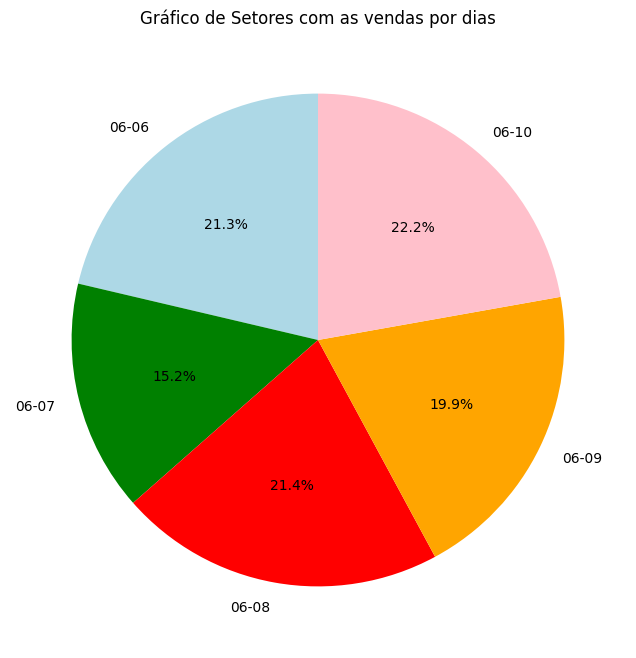

In [106]:
import matplotlib.pyplot as plt

# Criando o gráfico de pizza
plt.figure(figsize=(8, 8))  # Define o tamanho da figura
plt.pie(valores, labels=categorias, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'green', 'red', 'orange', 'pink'])
plt.title("Gráfico de Setores com as vendas por dias")

In [107]:
data_vendas_online['Valor da compra'].max() # vamos descobrir o valor que mais

899.16

## Projeto desafio 2: administração de condomínios

A administração de condomínios é uma tarefa que requer muita atenção e organização. Entre as diversas responsabilidades da gestão está o recebimento dos aluguéis dos locatários. Para garantir uma boa saúde financeira do empreendimento, é fundamental que esses pagamentos sejam feitos de forma regular e pontual. No entanto, sabemos que nem sempre isso acontece.

Pensando nisso, proponho um desafio de tratamento de dados com o objetivo de analisar o atraso no pagamento de aluguéis no condomínio de alguns moradores. Disponibilizo a base de dados dados_locacao_imoveis.json, que contém informações sobre o apartamento dos locatários, o dia acordado para o pagamento do aluguel, o dia da efetivação do pagamento de aluguel e o valor do aluguel.



In [108]:
# importação dos de vendas.
url2 = "https://cdn3.gnarususercontent.com.br/2928-transformacao-manipulacao-dados/dados_locacao_imoveis.json"
resposta = requests.get(url2)
# Convertendo o JSON para DataFrame
data_condominio  = pd.DataFrame(resposta.json())

In [109]:
data_condominio.head()

,dados_locacao
0,"{'apartamento': 'A101 (blocoAP)', 'datas_combi..."
1,"{'apartamento': 'A102 (blocoAP)', 'datas_combi..."
2,"{'apartamento': 'B201 (blocoAP)', 'datas_combi..."
3,"{'apartamento': 'B202 (blocoAP)', 'datas_combi..."
4,"{'apartamento': 'C301 (blocoAP)', 'datas_combi..."


## Projeto desafio 2: administração de condomínios

Lemos a base de dados no desafio anterior, agora podemos avançar nas transformações desses dados. Então, da mesma forma que o projeto 1, o desafio do projeto 2 está listado em algumas metas:

Remover os dados em listas dentro do DataFrame;
Verificar os tipos de dados;
Identificar colunas numéricas;
Transformar a coluna numérica para o tipo numérico.

In [110]:
data_condominio = pd.json_normalize(data_condominio['dados_locacao'])
#VISUALIZANDO O DATA FRAME
data_condominio

,apartamento,datas_combinadas_pagamento,datas_de_pagamento,valor_aluguel
0,A101 (blocoAP),"[01/06/2022, 01/07/2022]","[05/06/2022, 03/07/2022]","[$ 1000,0 reais, $ 2500,0 reais]"
1,A102 (blocoAP),"[02/06/2022, 02/07/2022]","[02/06/2022, 06/07/2022]","[$ 1100,0 reais, $ 2600,0 reais]"
2,B201 (blocoAP),"[03/06/2022, 03/07/2022]","[07/06/2022, 03/07/2022]","[$ 1200,0 reais, $ 2700,0 reais]"
3,B202 (blocoAP),"[04/06/2022, 04/07/2022]","[07/06/2022, 05/07/2022]","[$ 1300,0 reais, $ 2800,0 reais]"
4,C301 (blocoAP),"[05/06/2022, 05/07/2022]","[10/06/2022, 09/07/2022]","[$ 1400,0 reais, $ 2900,0 reais]"
5,C302 (blocoAP),"[06/06/2022, 06/07/2022]","[08/06/2022, 12/07/2022]","[$ 1500,0 reais, $ 1200,0 reais]"
6,D401 (blocoAP),"[07/06/2022, 07/07/2022]","[07/06/2022, 09/07/2022]","[$ 1600,0 reais, $ 1300,0 reais]"
7,D402 (blocoAP),"[08/06/2022, 08/07/2022]","[10/06/2022, 14/07/2022]","[$ 1700,0 reais, $ 1400,0 reais]"
8,E501 (blocoAP),"[09/06/2022, 09/07/2022]","[10/06/2022, 09/07/2022]","[$ 1800,0 reais, $ 1500,0 reais]"
9,E502 (blocoAP),"[10/06/2022, 10/07/2022]","[16/06/2022, 12/07/2022]","[$ 1900,0 reais, $ 1600,0 reais]"


In [111]:
colunas = list(data_condominio.columns)
data_condominio = data_condominio.explode(colunas[1:])
data_condominio

,apartamento,datas_combinadas_pagamento,datas_de_pagamento,valor_aluguel
0,A101 (blocoAP),01/06/2022,05/06/2022,"$ 1000,0 reais"
0,A101 (blocoAP),01/07/2022,03/07/2022,"$ 2500,0 reais"
1,A102 (blocoAP),02/06/2022,02/06/2022,"$ 1100,0 reais"
1,A102 (blocoAP),02/07/2022,06/07/2022,"$ 2600,0 reais"
2,B201 (blocoAP),03/06/2022,07/06/2022,"$ 1200,0 reais"
2,B201 (blocoAP),03/07/2022,03/07/2022,"$ 2700,0 reais"
3,B202 (blocoAP),04/06/2022,07/06/2022,"$ 1300,0 reais"
3,B202 (blocoAP),04/07/2022,05/07/2022,"$ 2800,0 reais"
4,C301 (blocoAP),05/06/2022,10/06/2022,"$ 1400,0 reais"
4,C301 (blocoAP),05/07/2022,09/07/2022,"$ 2900,0 reais"


In [112]:
data_condominio.reset_index(inplace= True, drop= True)
data_condominio.head()

,apartamento,datas_combinadas_pagamento,datas_de_pagamento,valor_aluguel
0,A101 (blocoAP),01/06/2022,05/06/2022,"$ 1000,0 reais"
1,A101 (blocoAP),01/07/2022,03/07/2022,"$ 2500,0 reais"
2,A102 (blocoAP),02/06/2022,02/06/2022,"$ 1100,0 reais"
3,A102 (blocoAP),02/07/2022,06/07/2022,"$ 2600,0 reais"
4,B201 (blocoAP),03/06/2022,07/06/2022,"$ 1200,0 reais"


In [113]:
data_condominio['valor_aluguel'].apply(lambda x: x.replace('$','').replace('reais','').replace(',','.').strip()) # tirando os cifrões do meu data_frame e tirando as vírgulas


,valor_aluguel
0,1000.0
1,2500.0
2,1100.0
3,2600.0
4,1200.0
5,2700.0
6,1300.0
7,2800.0
8,1400.0
9,2900.0


In [114]:
data_condominio['valor_aluguel'] = data_condominio['valor_aluguel'].apply(lambda x: x.replace('$','').replace('reais','').replace(',','.').strip()) # tirando os cifrões do meu data_frame e tirando as vírgulas
data_condominio.head()

,apartamento,datas_combinadas_pagamento,datas_de_pagamento,valor_aluguel
0,A101 (blocoAP),01/06/2022,05/06/2022,1000.0
1,A101 (blocoAP),01/07/2022,03/07/2022,2500.0
2,A102 (blocoAP),02/06/2022,02/06/2022,1100.0
3,A102 (blocoAP),02/07/2022,06/07/2022,2600.0
4,B201 (blocoAP),03/06/2022,07/06/2022,1200.0


In [115]:
data_condominio['valor_aluguel'] = data_condominio['valor_aluguel'].astype(np.float64)
data_condominio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   apartamento                 30 non-null     object 
 1   datas_combinadas_pagamento  30 non-null     object 
 2   datas_de_pagamento          30 non-null     object 
 3   valor_aluguel               30 non-null     float64
dtypes: float64(1), object(3)
memory usage: 1.1+ KB


## Projeto desafio 2: administração de condomínios

Buscando explicar a organização da identificação dos apartamentos, durante a criação do conjunto de dados, foi adicionado o texto (blocoAP). Esse texto informa que os nomes dos apartamentos estão organizados com a letra do bloco seguida do número do apartamento. No entanto, isso não traz nenhuma informação para nossos dados, sendo interessante realizar a remoção desse texto no conjunto de dados.

Com isso, manipule os textos na coluna apartamento para remover o texto (blocoAP) do DataFrame.

In [116]:
data_condominio['apartamento'] = data_condominio['apartamento'].str.replace(r'\(blocoAP\)',' ', regex= True)
data_condominio.head()

,apartamento,datas_combinadas_pagamento,datas_de_pagamento,valor_aluguel
0,A101,01/06/2022,05/06/2022,1000.0
1,A101,01/07/2022,03/07/2022,2500.0
2,A102,02/06/2022,02/06/2022,1100.0
3,A102,02/07/2022,06/07/2022,2600.0
4,B201,03/06/2022,07/06/2022,1200.0


## Projeto desafio 2: administração de condomínios

Nas colunas datas_de_pagamento e datas_combinadas_pagamento, temos datas em formato 'dia/mês/ano' (dd/mm/AAAA). Transforme esses dados para o tipo datetime e busque uma forma de visualização de subconjunto que possa contribuir no objetivo do contexto que os dados estão inseridos.

Lembre-se do projeto: A administração de condomínios é uma tarefa que requer muita atenção e organização. Entre as diversas responsabilidades da gestão está o recebimento dos aluguéis dos locatários. Para garantir uma boa saúde financeira do empreendimento, é fundamental que esses pagamentos sejam feitos de forma regular e pontual. No entanto, sabemos que nem sempre isso acontece. Pensando nisso, proponho um desafio de tratamento de dados com o objetivo de analisar o atraso no pagamento de aluguéis no condomínio fictício de alguns moradores.

In [117]:
data_condominio['datas_combinadas_pagamento'] = pd.to_datetime(data_condominio['datas_combinadas_pagamento'], format='%d/%m/%Y')
data_condominio['datas_de_pagamento'] = pd.to_datetime(data_condominio['datas_de_pagamento'], format='%d/%m/%Y')
data_condominio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   apartamento                 30 non-null     object        
 1   datas_combinadas_pagamento  30 non-null     datetime64[ns]
 2   datas_de_pagamento          30 non-null     datetime64[ns]
 3   valor_aluguel               30 non-null     float64       
dtypes: datetime64[ns](2), float64(1), object(1)
memory usage: 1.1+ KB


In [118]:
data_condominio.head()

,apartamento,datas_combinadas_pagamento,datas_de_pagamento,valor_aluguel
0,A101,2022-06-01,2022-06-05,1000.0
1,A101,2022-07-01,2022-07-03,2500.0
2,A102,2022-06-02,2022-06-02,1100.0
3,A102,2022-07-02,2022-07-06,2600.0
4,B201,2022-06-03,2022-06-07,1200.0


### Vamos encontrar a diferença em a data de pagamento e data esperada de pagamento.



In [119]:
data_condominio['Dias em atraso'] = (data_condominio['datas_de_pagamento'] - data_condominio['datas_combinadas_pagamento']).dt.days
data_condominio.head()

,apartamento,datas_combinadas_pagamento,datas_de_pagamento,valor_aluguel,Dias em atraso
0,A101,2022-06-01,2022-06-05,1000.0,4
1,A101,2022-07-01,2022-07-03,2500.0,2
2,A102,2022-06-02,2022-06-02,1100.0,0
3,A102,2022-07-02,2022-07-06,2600.0,4
4,B201,2022-06-03,2022-06-07,1200.0,4


In [121]:
(data_condominio['Dias em atraso'] < 0).any() # verificar se há pagamento antes da data na nossa base de dados.

False

In [122]:
atraso_de_parcelas = data_condominio['Dias em atraso'].value_counts(normalize=True).reset_index()
atraso_de_parcelas

,Dias em atraso,proportion
0,2,0.200000
1,0,0.166667
2,6,0.166667
3,4,0.133333
4,3,0.133333
5,1,0.133333
6,5,0.033333
7,7,0.033333


In [125]:
atraso_de_parcelas.columns = ['Dias em Atraso', 'porcentagem']
atraso_de_parcelas['porcentagem'] *= 100
atraso_de_parcelas

,Dias em Atraso,porcentagem
0,2,20.000000
1,0,16.666667
2,6,16.666667
3,4,13.333333
4,3,13.333333
5,1,13.333333
6,5,3.333333
7,7,3.333333


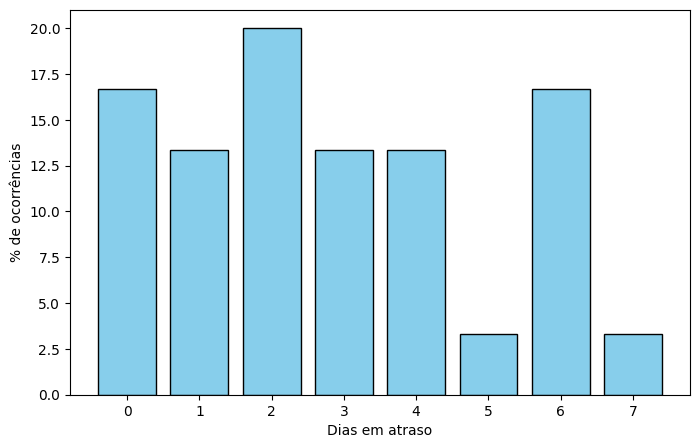

In [134]:
# criando um gráfico de barras
import matplotlib.pyplot as plt

# Ordenando os valores em ordem decrescente (Pareto)
atraso_de_parcelas = atraso_de_parcelas.sort_values(by='porcentagem', ascending=False)

plt.figure(figsize=(8, 5))
plt.bar(atraso_de_parcelas['Dias em Atraso'], atraso_de_parcelas['porcentagem'], color='skyblue', edgecolor='black')

plt.xlabel('Dias em atraso')
plt.ylabel('% de ocorrências')

plt.show()

In [140]:
# Calcular a média de tempo de atraso por apartamentos
media_atraso = data_condominio.groupby(['apartamento'])['Dias em atraso'].mean() # verificando a média de atrasos por apartamento
media_atraso

,Dias em atraso
apartamento,
A101,3.0
A102,2.0
B201,2.0
B202,2.0
C301,4.5
C302,4.0
D401,1.0
D402,4.0
E501,0.5


Para fazer um estudo financeiro de distribuição salarial em uma empresa, você precisa transformar os dados referentes aos cargos e deixá-los prontos para um estudo estatístico.

Desse modo, ao ler o arquivo com dados, você encontra o seguinte DataFrame:

In [27]:
import pandas as pd
import numpy as np

# dados da empresa
dados = {
    'cargo': ['Gerencia', 'Coordenação', 'Supervisão', 'Analista', 'Assistente', 'Operação', 'Auxiliar', 'Estágio', 'Assessoria', 'Consultoria'],
    'quantidade': ['2 pessoas', '1 pessoa', '3 pessoas', '4 pessoas', '5 pessoas', '3 pessoas', '2 pessoas', '1 pessoa', '1 pessoa', '1 pessoa'],
    'salario': ['$10.000 reais', '$8.000 reais', '$7.000 reais', '$5.000 reais', '$4.000 reais', '$3.500 reais', '$3.000 reais', '$1.500 reais', '$2.500 reais', '$6.000 reais']
}

# transformando o dicionário em DataFrame
df = pd.DataFrame(dados)

# df é o DataFrame com os dados da empresa
df

,cargo,quantidade,salario
0,Gerencia,2 pessoas,$10.000 reais
1,Coordenação,1 pessoa,$8.000 reais
2,Supervisão,3 pessoas,$7.000 reais
3,Analista,4 pessoas,$5.000 reais
4,Assistente,5 pessoas,$4.000 reais
5,Operação,3 pessoas,$3.500 reais
6,Auxiliar,2 pessoas,$3.000 reais
7,Estágio,1 pessoa,$1.500 reais
8,Assessoria,1 pessoa,$2.500 reais
9,Consultoria,1 pessoa,$6.000 reais


In [28]:
#Removemos os textos que estão em volta dos números com apply e lambda.
df['quantidade'] = df['quantidade'].apply(lambda x: x.replace(' pessoas', '').replace(' pessoa', ''))
df['salario'] = df['salario'].apply(lambda x: x.replace('$', '').replace(' reais', '').replace('.',''))
#visualizando o dataframe depois de corrigir as informações
df

,cargo,quantidade,salario
0,Gerencia,2,10000
1,Coordenação,1,8000
2,Supervisão,3,7000
3,Analista,4,5000
4,Assistente,5,4000
5,Operação,3,3500
6,Auxiliar,2,3000
7,Estágio,1,1500
8,Assessoria,1,2500
9,Consultoria,1,6000


In [29]:
# Depois, vamos transformar as colunas para o tipo numérico com o astype.
df['quantidade'] = df['quantidade'].astype(np.int64)
df['salario'] = df['salario'].astype(np.float64)
#visualizando o dataframe depois de corrigir as informações
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   cargo       10 non-null     object 
 1   quantidade  10 non-null     int64  
 2   salario     10 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 372.0+ bytes


In [30]:
df['Salario_gasto_por_cargo'] = df['salario']*df['quantidade']
df

,cargo,quantidade,salario,Salario_gasto_por_cargo
0,Gerencia,2,10000.0,20000.0
1,Coordenação,1,8000.0,8000.0
2,Supervisão,3,7000.0,21000.0
3,Analista,4,5000.0,20000.0
4,Assistente,5,4000.0,20000.0
5,Operação,3,3500.0,10500.0
6,Auxiliar,2,3000.0,6000.0
7,Estágio,1,1500.0,1500.0
8,Assessoria,1,2500.0,2500.0
9,Consultoria,1,6000.0,6000.0


In [31]:
total_folha = sum(df['Salario_gasto_por_cargo'])
total_func = sum(df['quantidade'])
media_salario = total_folha / total_func
media_salario


5021.739130434783

In [32]:
df[df['cargo'] == 'Gerencia']

,cargo,quantidade,salario,Salario_gasto_por_cargo
0,Gerencia,2,10000.0,20000.0


In [33]:
import datetime

# criando um objeto datetime com a data e hora atual
agora = datetime.datetime.now()

print("Data e hora atual:", agora)

Data e hora atual: 2025-03-06 02:10:36.580767


### Exerício sobre datetime

Você é responsável pela análise de dados de uma empresa que realiza vendas de produtos. Você recebeu um conjunto de dados com informações sobre as vendas realizadas nos últimos meses, mas notou que a coluna "Data de venda" está no formato de string (texto), e não no formato de data. Para realizar as análises, é necessário converter essa coluna para o formato de data.

In [34]:
import pandas as pd

# Criando o DataFrame com as informações
dados = pd.DataFrame({
    'Data de venda': ['01/01/2022', '05/02/2022', '10/03/2022', '15/04/2022','18/04/2022','20/04/2022'],
    'Valor': [100, 150, 200, 250,80,180]
})

# Exibindo o DataFrame
dados

,Data de venda,Valor
0,01/01/2022,100
1,05/02/2022,150
2,10/03/2022,200
3,15/04/2022,250
4,18/04/2022,80
5,20/04/2022,180


In [35]:
pd.to_datetime(dados['Data de venda'], format='%d/%m/%Y')

,Data de venda
0,2022-01-01
1,2022-02-05
2,2022-03-10
3,2022-04-15
4,2022-04-18
5,2022-04-20
